# Bibliotecas

In [1]:
from madeiras import ProjetoOtimo, chamando_nsga2
import pandas as pd
import matplotlib.pyplot as plt

c:\Users\user\Documents\wanderpy\reliabridge\myenv\Lib\site-packages\UQpy\__init__.py:6: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


# Execução da otimização

In [2]:
df = pd.read_excel("C:\\Users\\user\\Downloads\\beam_data(1).xlsx")
df = df.to_dict(orient="records")
df = df[0] 
df

{'l (cm)': 600,
 'b_wpista (cm)': 900,
 'tipo_secao_longarina': 'Circular',
 'tipo_secao_tabuleiro': 'Retangular',
 'p_gk (kN/m²)': 1,
 'p_rodak (kN)': 40,
 'p_qk (kN/m²)': 4,
 'a (m)': 1.5,
 'classe_carregamento': 'permanente',
 'classe_madeira': 'madeira natural',
 'classe_umidade': 1,
 'gamma_g': 1.4,
 'gamma_q': 1.4,
 'gamma_w': 1.4,
 'psi_2': 0.3,
 'phi': 0.8,
 'densidade longarina (kg/m³)': 350,
 'resistência característica à flexão longarina (MPa)': 50,
 'resistência característica ao cisalhamento longarina (MPa)': 20,
 'módulo de elasticidade à flexão longarina (GPa)': 12,
 'densidade tabuleiro (kg/m³)': 350,
 'resistência característica à flexão tabuleiro (MPa)': 40}

In [3]:
ds = [30, 150]
esps = [30, 200]
bws = [12, 60]
hs = [12, 60]
res_nsga = chamando_nsga2(df, ds, esps, bws, hs)

In [4]:
res_nsga

,d [cm],esp [cm],bw [cm],h [cm],area [m²],delta [m],flex lim beam [kPa],cis lim beam [kPa],delta lim beam [m],flex lim deck [kPa]
0,30.000000,72.461825,12.000000,12.000000,0.085086,0.006391,-10577.192913,-6474.120242,-0.008183,-235.054628
1,30.994385,199.869794,12.002377,59.154460,0.146449,0.022301,-0.015135,-4749.114290,-0.001699,-13195.998283
2,30.628613,198.465948,12.000000,54.901363,0.139561,0.022252,-0.469578,-4773.241400,-0.001748,-12603.657314
3,30.786048,197.723014,12.000000,57.335651,0.143241,0.022270,-4.015578,-4763.553263,-0.001730,-13000.114886
4,30.214237,197.837763,12.000000,49.733336,0.131379,0.022178,-0.571210,-4799.561889,-0.001822,-11636.960411
...,...,...,...,...,...,...,...,...,...,...
495,30.000000,199.999999,12.000000,44.449175,0.124025,0.021736,-265.382012,-4854.344774,-0.002264,-10155.956364
496,30.000000,199.999985,12.000000,35.824475,0.113675,0.019641,-1673.010960,-5075.454612,-0.004359,-6396.511446
497,30.000000,143.452171,12.000000,22.581912,0.097784,0.012389,-6546.533425,-5840.985730,-0.008183,-5.499133
498,30.000000,113.289658,12.000000,18.826229,0.093277,0.009720,-8340.436746,-6122.771405,-0.008183,-52.490611


# Fronteira eficiente

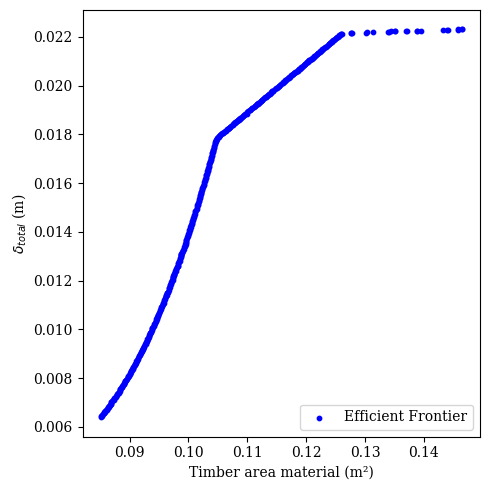

In [5]:
plt.rc('font', family='serif')
plt.figure(figsize=(5, 5))
plt.scatter(res_nsga["area [m²]"].to_list(), res_nsga["delta [m]"].to_list(), label="Efficient Frontier", color='blue', s=10)
plt.xlabel(r"Timber area material (m²)")
plt.ylabel(r"$\delta_{total}$ (m)")
plt.legend(loc='lower right',)
plt.tight_layout()
plt.show()

# Teste da função objetivo

In [6]:
import numpy as np

# 1) Instancia o problema
problem = ProjetoOtimo(
                        l=df["l (cm)"],
                        p_gk=df["p_gk (kN/m²)"],
                        p_rodak=df["p_rodak (kN)"],
                        p_qk=df["p_qk (kN/m²)"],
                        a=df["a (m)"],
                        classe_carregamento=df["classe_carregamento"],
                        classe_madeira=df["classe_madeira"],
                        classe_umidade=df["classe_umidade"],
                        gamma_g=df["gamma_g"],
                        gamma_q=df["gamma_q"],
                        gamma_w=df["gamma_w"],
                        psi2=df["psi_2"],
                        phi=df["phi"],
                        densidade_long=df["densidade longarina (kg/m³)"],
                        densidade_tab=df["densidade tabuleiro (kg/m³)"],
                        f_mk_long=df["resistência característica à flexão longarina (MPa)"],
                        f_vk_long=df["resistência característica ao cisalhamento longarina (MPa)"],
                        e_modflex_long=df["módulo de elasticidade à flexão longarina (GPa)"],
                        f_mk_tab=df["resistência característica à flexão tabuleiro (MPa)"],
                        d_min=ds[0],
                        d_max=ds[1],
                        esp_min=esps[0],
                        esp_max=esps[1],
                        bw_min=bws[0],
                        bw_max=bws[1],
                        h_min=hs[0],
                        h_max=hs[1],
                    )

# 2) Define uma solução manual
x_manual = np.array([[90.0, 50.0, 20., 40.]])   # d, esp, bw, h

# 3) Avalia
out = problem.evaluate(x_manual, return_values_of=["F", "G"])

# 4) Imprime resultados
f = out[0]
g = out[1]
print(f, g)

[[ 7.16172512e-01 -1.26051115e-04]] [[-2.09316168e+04 -8.37739483e+03 -1.70322419e-02 -1.69732602e+04]]


# Monte Carlo

Total amostras: 25000
Viáveis: 24150


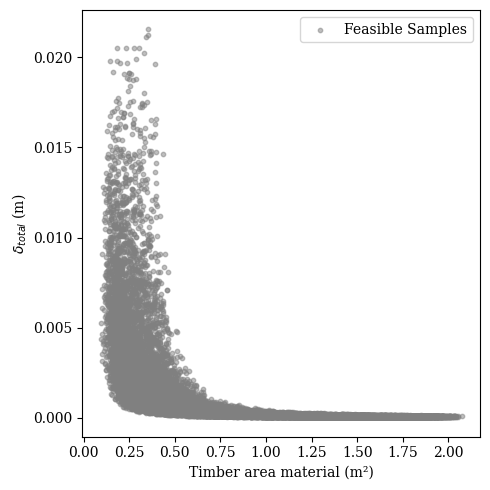

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# Monte Carlo + filtro viável
# ---------------------------
N = 25000
rng = np.random.default_rng(123)

# amostra uniformemente no intervalo do problema
d_mc = rng.uniform(problem.xl[0], problem.xu[0], size=N)
X_mc = d_mc.reshape(-1, 1)   # shape (N,1)
esp_mc = rng.uniform(problem.xl[1], problem.xu[1], size=N)
bw_mc = rng.uniform(problem.xl[2], problem.xu[2], size=N)
h_mc = rng.uniform(problem.xl[3], problem.xu[3], size=N)
X_mc = np.column_stack((d_mc, esp_mc, bw_mc,  h_mc))  # shape (N,4)

# avalia em lote
out = problem.evaluate(X_mc, return_values_of=["F", "G"])
F = np.asarray(out[0])   # shape (N,2)
G = np.asarray(out[1])   # shape (N,4)

# filtro de viabilidade: todas restrições <= 0
mask_feas = np.all(G <= 0.0, axis=1)

F_feas = F[mask_feas]
G_feas = G[mask_feas]
X_feas = X_mc[mask_feas]

print("Total amostras:", N)
print("Viáveis:", int(mask_feas.sum()))

# ---------------------------
# Scatter plot (f1 vs f2)
# ---------------------------
# Se seu f2 = -delta, converta para delta positivo no plot:
F_plot = F_feas.copy()
F_plot[:, 1] = -F_plot[:, 1]

plt.rc('font', family='serif')
plt.figure(figsize=(5, 5))
plt.scatter(F_plot[:, 0], F_plot[:, 1], s=10, color='gray', alpha=0.5, label="Feasible Samples")
plt.xlabel(r"Timber area material (m²)")
plt.ylabel(r"$\delta_{total}$ (m)")
plt.legend(loc='upper right',)
plt.tight_layout()
plt.show()

# Unindo as duas soluções

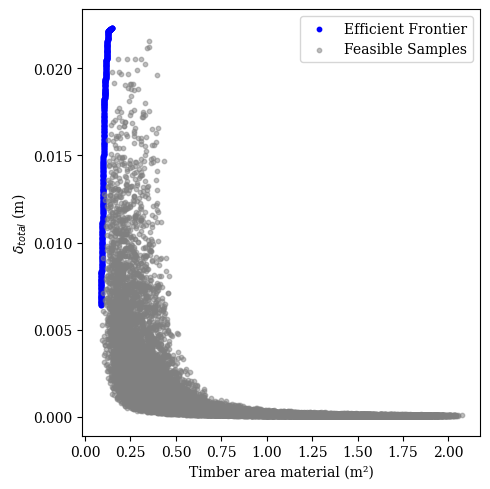

In [8]:
plt.rc('font', family='serif')
plt.figure(figsize=(5, 5))
plt.scatter(res_nsga["area [m²]"].to_list(), res_nsga["delta [m]"].to_list(), label="Efficient Frontier", color='blue', s=10)
plt.scatter(F_plot[:, 0], F_plot[:, 1], s=10, color='gray', alpha=0.5, label="Feasible Samples")
plt.xlabel(r"Timber area material (m²)")
plt.ylabel(r"$\delta_{total}$ (m)")
plt.legend(loc='upper right',)
plt.tight_layout()
plt.show()